In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

2024-11-01 00:07:33.366152: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730390853.385050  101801 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730390853.390062  101801 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df = pd.read_csv("../data/weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
features_selected = ['Formatted Date', 'Temperature (C)']

In [6]:
df = df[features_selected]
df.head()

,Formatted Date,Temperature (C)
0,2006-04-01 00:00:00.000 +0200,9.472222
1,2006-04-01 01:00:00.000 +0200,9.355556
2,2006-04-01 02:00:00.000 +0200,9.377778
3,2006-04-01 03:00:00.000 +0200,8.288889
4,2006-04-01 04:00:00.000 +0200,8.755556


In [7]:
df = df.rename(columns={'Formatted Date':'datetime', 'Temperature (C)': 'airTemperature'})
df.head()

,datetime,airTemperature
0,2006-04-01 00:00:00.000 +0200,9.472222
1,2006-04-01 01:00:00.000 +0200,9.355556
2,2006-04-01 02:00:00.000 +0200,9.377778
3,2006-04-01 03:00:00.000 +0200,8.288889
4,2006-04-01 04:00:00.000 +0200,8.755556


In [8]:
df['datetime'] = pd.to_datetime(df['datetime'], utc=True).dt.strftime('%Y-%m-%d %H:%M:%S')
df.head()

,datetime,airTemperature
0,2006-03-31 22:00:00,9.472222
1,2006-03-31 23:00:00,9.355556
2,2006-04-01 00:00:00,9.377778
3,2006-04-01 01:00:00,8.288889
4,2006-04-01 02:00:00,8.755556


In [9]:
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)

In [10]:
df.isna().sum()

airTemperature    0
dtype: int64

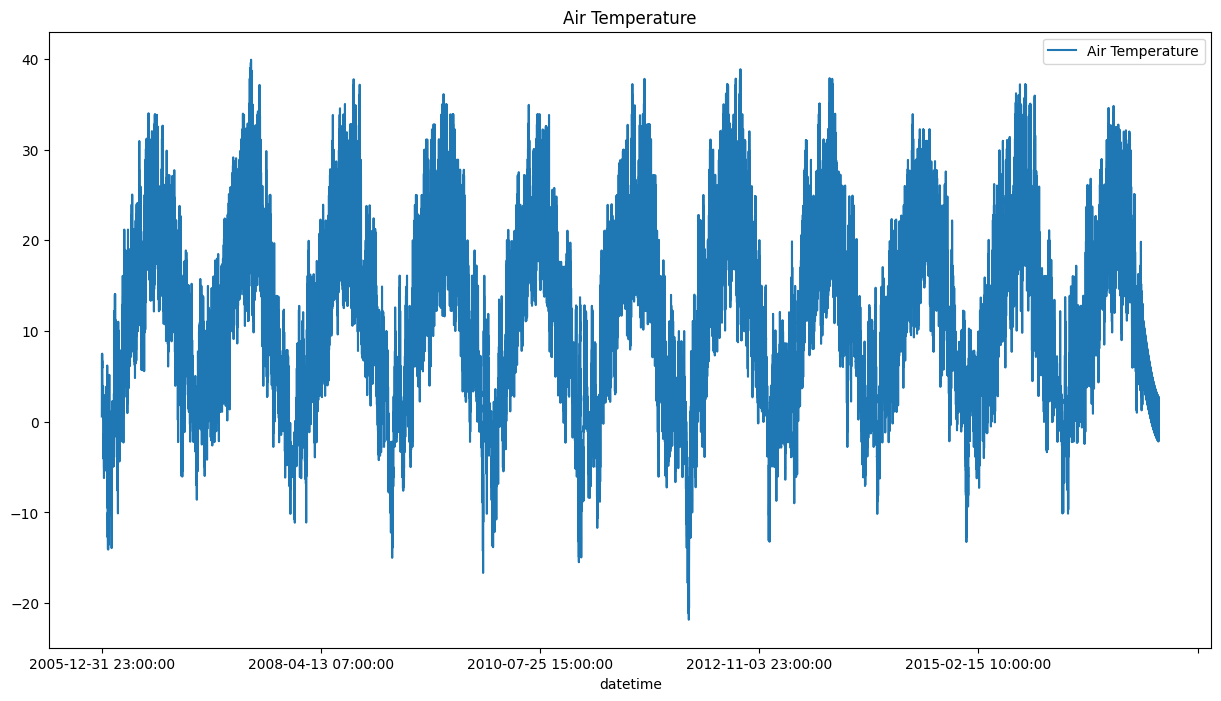

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
df.plot(ax=ax)
ax.set_title('Air Temperature')
ax.legend(['Air Temperature'])
plt.show()

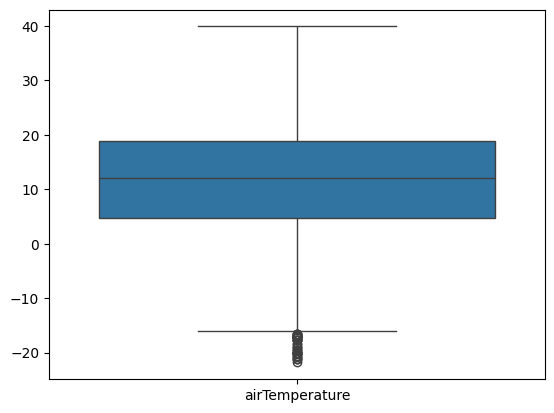

In [12]:
sns.boxplot(data=df)
plt.show()

In [13]:
for i in ['airTemperature']:
    q75, q25 = np.percentile(df.loc[:, i], [75, 25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan
df.dropna(inplace=True)

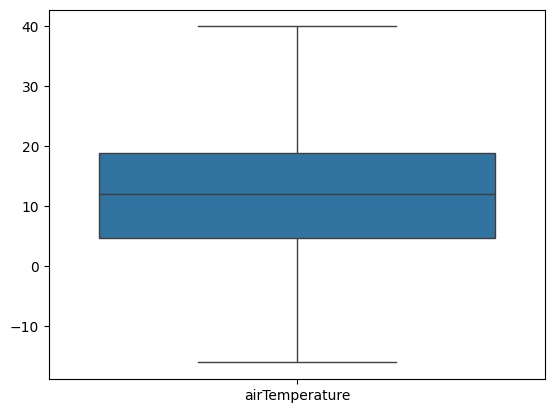

In [14]:
sns.boxplot(data=df)
plt.show()

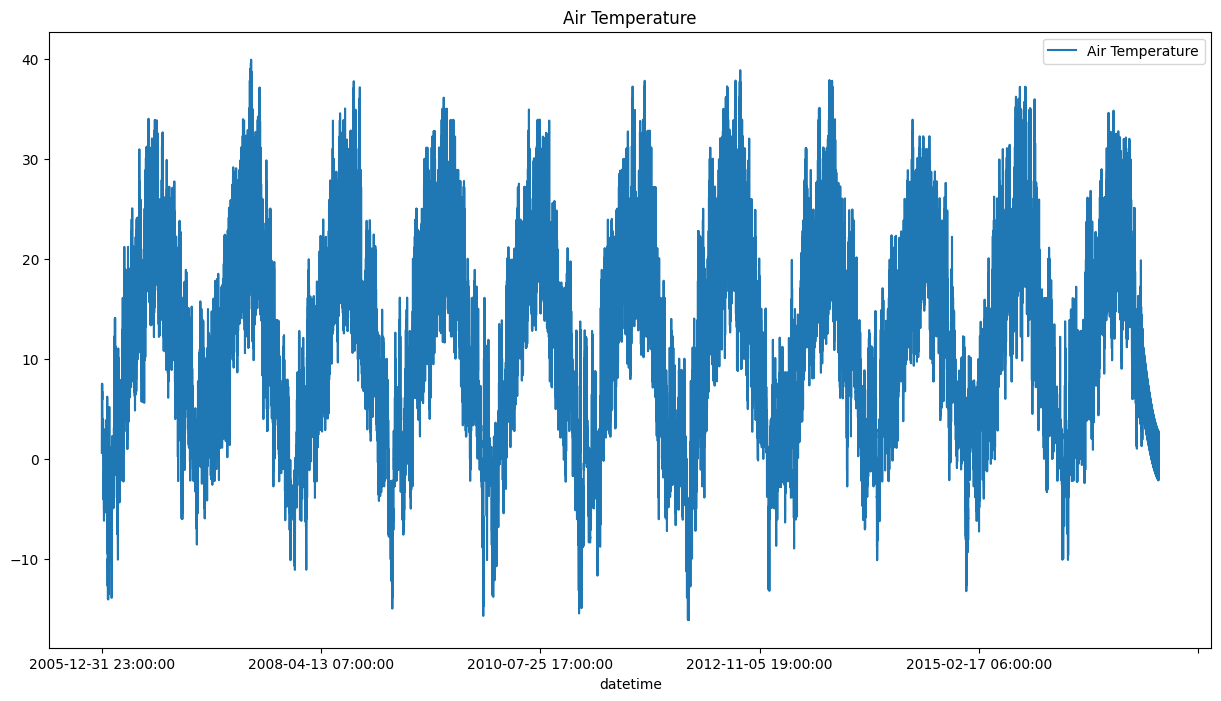

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))
df.plot(ax=ax)
ax.set_title('Air Temperature')
ax.legend(['Air Temperature'])
plt.show()

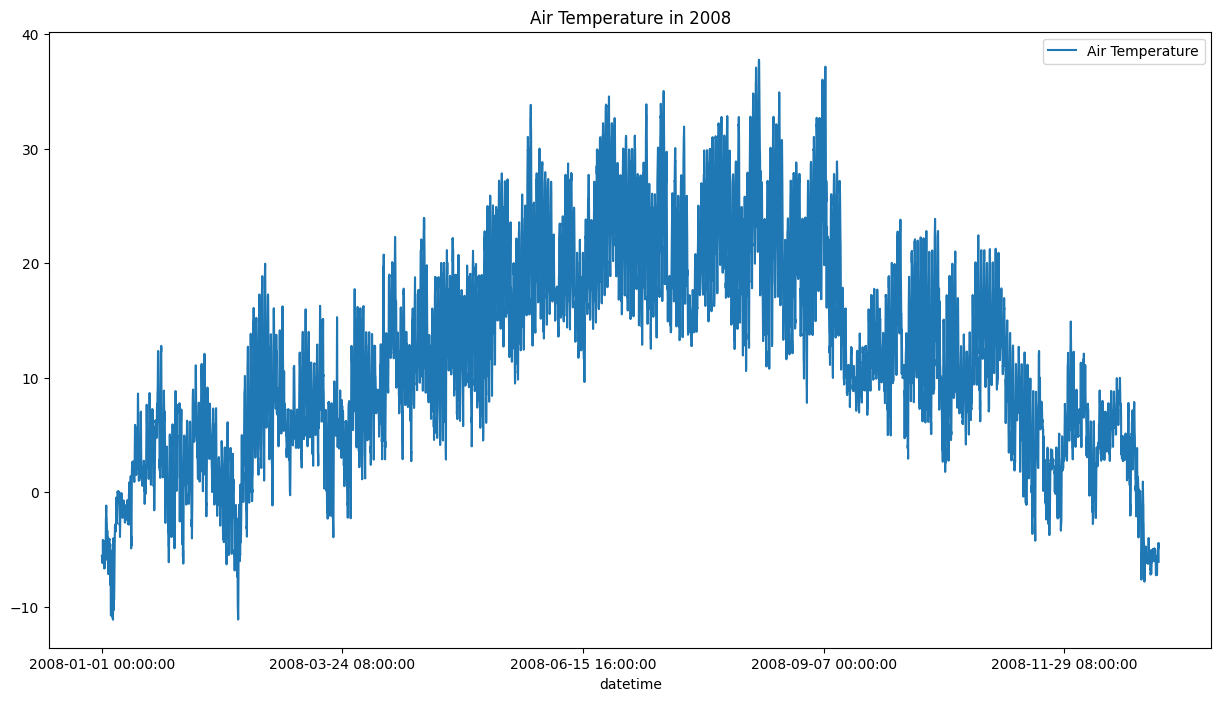

In [16]:
fig, ax = plt.subplots(figsize=(15, 8))
df.loc[(df.index >= '2008-01-01 00:00:00') & (df.index < '2009-01-01 00:00:00')].plot(ax=ax)
ax.set_title('Air Temperature in 2008')
ax.legend(['Air Temperature'])
plt.show()

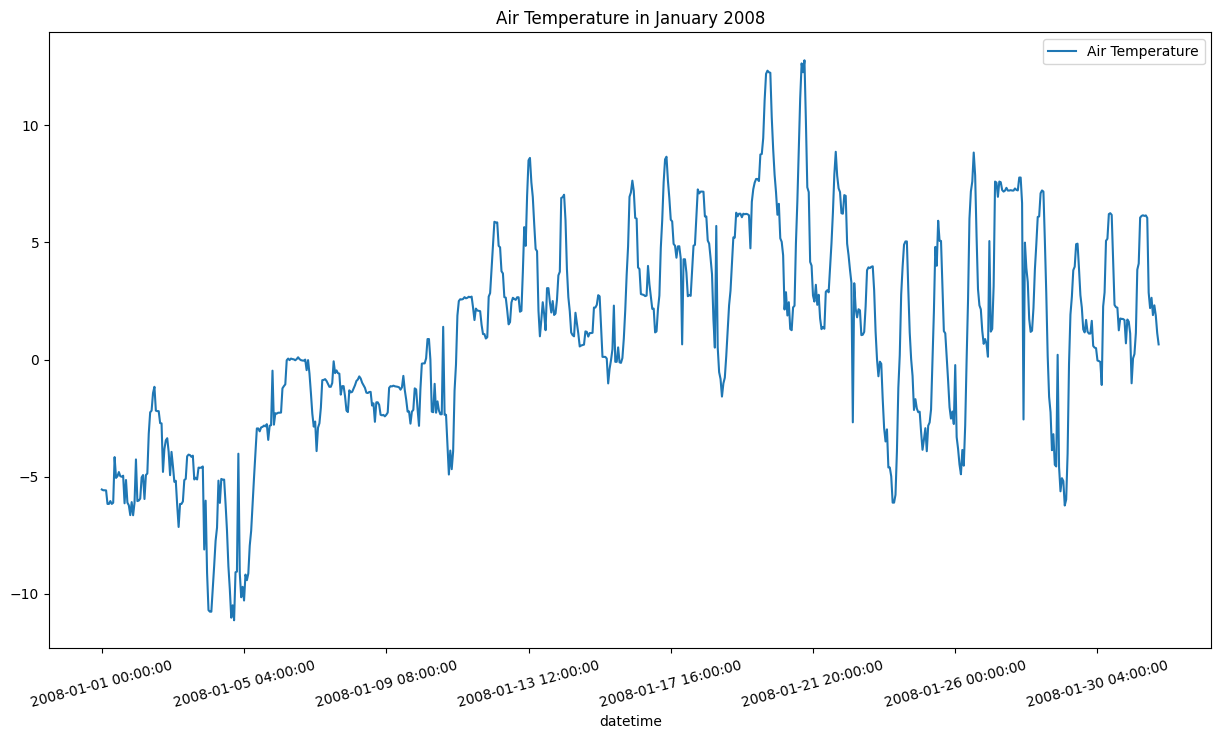

In [21]:
fig, ax = plt.subplots(figsize=(15, 8))
df.loc[(df.index >= '2008-01-01 00:00:00') & (df.index < '2008-02-01 00:00:00')].plot(ax=ax)
ax.set_title('Air Temperature in January 2008')
ax.legend(['Air Temperature'])
plt.xticks(rotation=15)
plt.show()

In [48]:
scalar = MinMaxScaler()
scalar.fit(df)

MinMaxScaler()

In [49]:
def create_sequences(sequence, n_steps =30):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [50]:
df['scaled'] = scalar.transform(df)

In [54]:
time_steps = 30
n_features = 1
x_seq, y_seq = create_sequences(df['scaled'], n_steps=time_steps)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x_seq, y_seq, test_size=0.2, shuffle=False)

In [56]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((77103, 30), (77103,), (19276, 30), (19276,))

In [57]:
X_train, X_test = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features)), np.reshape(X_test, (X_test.shape[0], X_test.shape[1], n_features))

In [84]:
model = keras.models.Sequential(name='LSTM')
model.add(keras.layers.Input(shape=(time_steps, n_features)))
model.add(keras.layers.LSTM(64, activation='relu', return_sequences=False))
# model.add(keras.layers.LSTM(32, activation='relu'))
model.add(keras.layers.Dense(1, name='dense_1'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

In [85]:
model.summary()

Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10


ValueError: 'LSTM_LSTM 1_LSTM_LSTM_lstm_8_lstm_cell_kernel_momentum' is not a valid scope name. A scope name has to match the following pattern: ^[A-Za-z0-9_.\\/>-]*$

In [ ]:
history.history.keys()

In [ ]:
# plt.plot(history.history['loss'])
plt.plot(history.history['mean_squared_error'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
predict = model.predict(X_test)

In [54]:
predict, y_test = scalar.inverse_transform(predict), scalar.inverse_transform(y_test)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(predict)
ax.plot(y_test)
plt.show()